**Importing necessary libraries:**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

**Loading the twic_master dataset:**

In [ ]:
chess_data = pd.read_csv('/content/twic_master.csv')

<ipython-input-39-c50171d8f39e>:1: DtypeWarning: Columns (10,13,14,23,25) have mixed types. Specify dtype option on import or set low_memory=False.
  chess_data = pd.read_csv('/content/twic_master.csv')


In [ ]:
#Checking the cloumns in the dataset
chess_data.columns

Index(['twic_number', 'White', 'Black', 'Date', 'EventDate', 'Event', 'Result',
       'mainline_moves', 'Site', 'Online', 'Round', 'ECO', 'Opening',
       'WhiteFideId', 'BlackFideId', 'WhiteElo', 'BlackElo', 'Variation',
       'WhiteTitle', 'BlackTitle', 'WhiteTeam', 'BlackTeam', 'EventType',
       'FEN', 'SetUp', 'Variant', 'Board', 'PlyCount', 'EventCategory'],
      dtype='object')

In [ ]:
chess_data.Result.value_counts()

Result
1-0        385709
0-1        317714
1/2-1/2    245133
*               9
-/+             6
+/-             4
0-0             4
00-1            1
1/2 1/2         1
(+)-(-)         1
1-O             1
Name: count, dtype: int64

In [ ]:
chess_data.shape

(948583, 29)

In [ ]:
chess_data.dtypes

twic_number         int64
White              object
Black              object
Date               object
EventDate          object
Event              object
Result             object
mainline_moves     object
Site               object
Online             object
Round              object
ECO                object
Opening            object
WhiteFideId       float64
BlackFideId       float64
WhiteElo          float64
BlackElo          float64
Variation          object
WhiteTitle         object
BlackTitle         object
WhiteTeam          object
BlackTeam          object
EventType          object
FEN                object
SetUp             float64
Variant            object
Board             float64
PlyCount          float64
EventCategory     float64
dtype: object

In [ ]:
chess_data[chess_data['Online']==False]['EventType'].unique()

array([nan, 'blitz', 'swiss', 'tourn (blitz)', 'team-swiss', 'team',
       'team-tourn', 'match', 'tourn', 'Team', 'rapid', 'swiss (rapid)',
       'swiss (blitz)', 'schev (rapid)', 'k.o.', 'schev', 'match (rapid)',
       'match (blitz)', 'tourn (corr)', 'team-match', 'team (rapid)',
       'team-match (blitz)'], dtype=object)

In [ ]:
# creating a dataframe df
df = chess_data.copy()

In [ ]:
chess_data[chess_data['mainline_moves'].isnull()]['Date'].unique()

array(['2018-12-26', '2018-12-27', '2018-12-28', ..., '2017-09-27',
       '2017-09-29', '2017-09-25'], dtype=object)

**Exploring the data:**

In [ ]:
columns_to_drop = ['Variation', 'twic_number', 'EventDate', 'mainline_moves', 'Site',
                   'Round', 'ECO', 'WhiteFideId', 'BlackFideId', 'WhiteTeam', 'BlackTeam', 'WhiteTitle', 'BlackTitle',
                   'EventType', 'FEN', 'SetUp', 'Variant', 'Board', 'PlyCount', 'EventCategory']

df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
df.head()

,White,Black,Date,Event,Result,Online,Opening,WhiteElo,BlackElo
0,"Tukhaev,A","Carlsen,M",2018-12-26,World Rapid 2018,1-0,False,Sicilian,2527.0,2835.0
1,"Nakamura,Hi","Teske,H",2018-12-26,World Rapid 2018,1-0,False,Reti opening,2746.0,2483.0
2,"Tari,A","Artemiev,V",2018-12-26,World Rapid 2018,0-1,False,Sicilian,2620.0,2709.0
3,"Fedoseev,Vl3","Tregubov,P",2018-12-26,World Rapid 2018,1/2-1/2,False,Petrov's defence,2719.0,2592.0
4,"Hovhannisyan,R","Aronian,L",2018-12-26,World Rapid 2018,1-0,False,Robatsch defence,2637.0,2765.0


In [ ]:
df['Year'] = df['Date'].map(lambda x: str(x)[:4])

print(df['Year'].unique())

# Get Selected Years
df = df[df['Year'].isin(['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'])].copy()

['2018' '2017' '2015' '2014' '2020' '2016' '2013' '2012' '2022' '2021'
 '2019' '2005']


**Visualizing the most played openings over the year:**

In [ ]:
visualization_1 = df.groupby(['Year', 'Opening'])['Opening'].count().reset_index(name='count').sort_values(['Year', 'count'], ascending=[True, False]).groupby('Year').head(3)

visualization_1 = visualization_1.query("""Year <= '2022'""")

In [ ]:

visualization_1.Opening.unique()

array(['Sicilian', 'French', "King's Indian", "Queen's pawn game"],
      dtype=object)

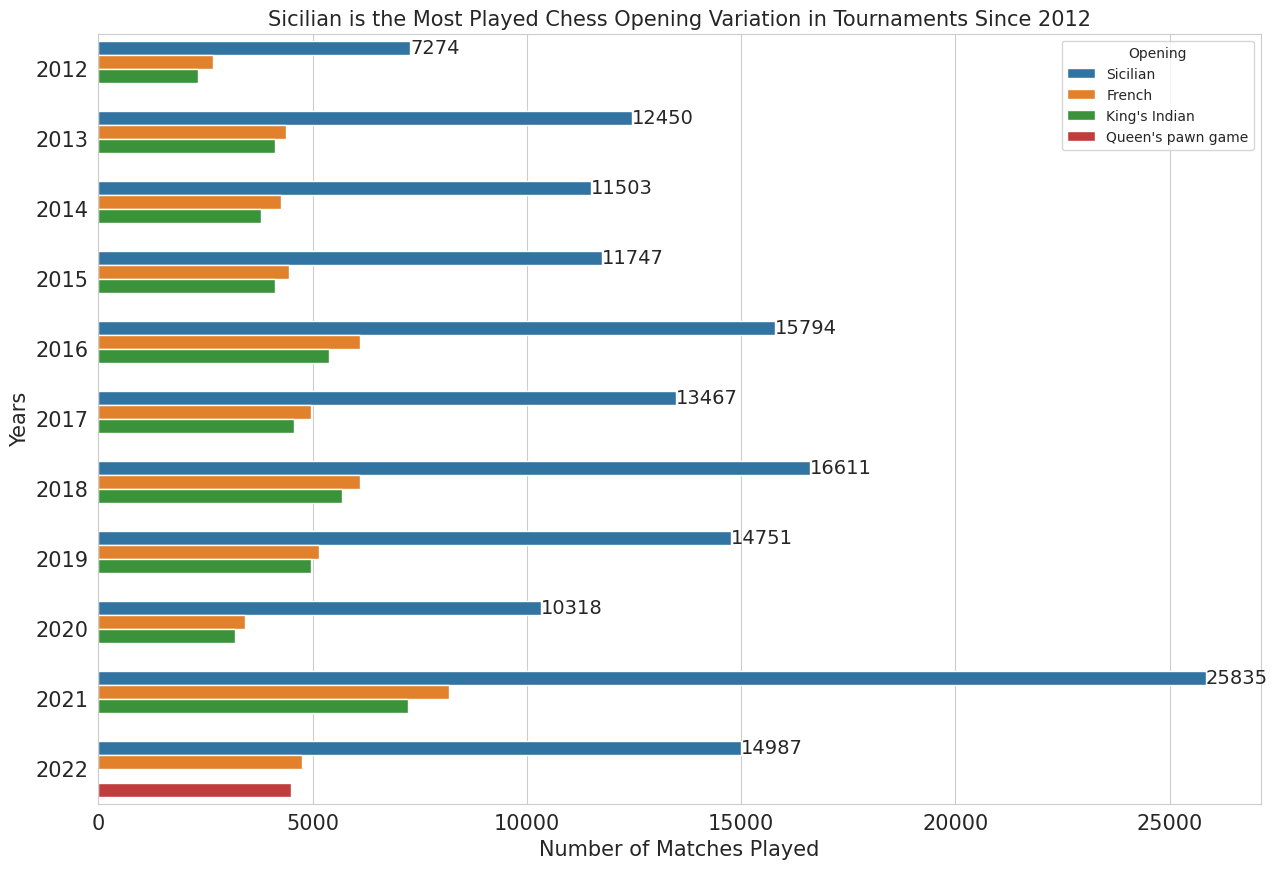

In [ ]:
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
plt.title("Sicilian is the Most Played Chess Opening Variation in Tournaments Since 2012",size=15)

palette={'Sicilian':'#448AFF',
         'French':'#455A64',
         'King\'s Indian':'#607D8B',
         'Queen\'s pawn game':'#CFD8DC'}

visualization_1_plot = sns.barplot(data=visualization_1, x="count", y="Year", hue="Opening")

visualization_1_plot.bar_label(visualization_1_plot.containers[0],size=14)

plt.ylabel("Years",size = 15)
plt.tick_params(axis='y',labelsize=15)

plt.xlabel("Number of Matches Played", size = 15)
plt.tick_params(axis='x',labelsize=15)

fig = visualization_1_plot.get_figure()
fig.savefig("DMV_Q1_MostPlayedOpening.png")

**Visualizing the analysis of chess format games**

In [ ]:
visualization_2 = df[['Year', 'Online']].groupby(['Year', 'Online'])['Online'].count()
visualization_2 = pd.DataFrame(visualization_2).rename(columns={"Online": "Match_Count"}).reset_index()
visualization_2['Online'].replace([True,False],['Online','Offline'],inplace=True)

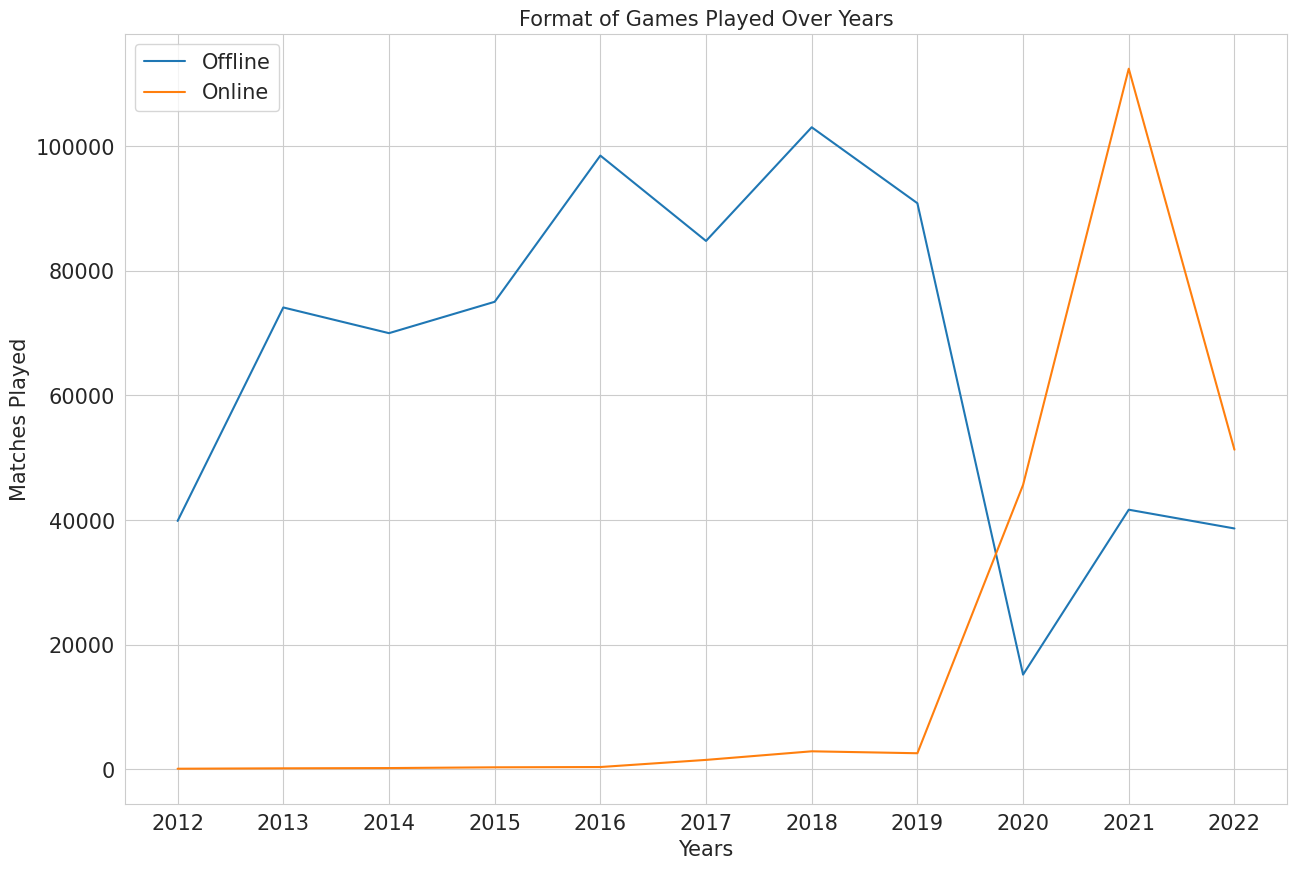

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,10))
plt.title("Format of Games Played Over Years",size=15)
plt.xlabel("Years",size = 15)
plt.tick_params(axis='x',labelsize=15)
plt.ylabel("Matches Played", size = 15)
plt.tick_params(axis='y',labelsize=15)
sns.lineplot(data=visualization_2, x='Year', y='Match_Count',hue='Online')
plt.legend(loc='upper left',prop={'size':15})

**Visualizing the winning rate of chess pieces**


In [ ]:
visualization_3 = df[['White', 'Black','Result','Event','Year']].groupby(['Year','Result'])['Result'].count()

conditions = [(df['Result'] == '1-0'),
    (df['Result'] == '0-1'),
    (df['Result'] == '1/2-1/2')]
values = ['White_Pieces', 'Black_Pieces','Draw']
df['Winners'] = np.select(conditions,values)

visualization_3 = df[['Year','Winners']].groupby(['Year','Winners'])['Winners'].count()

visualization_3 = pd.DataFrame(visualization_3).rename(columns={"Winners": "Match_Count"}).reset_index()

visualization_3 = visualization_3[visualization_3.Winners != '0']

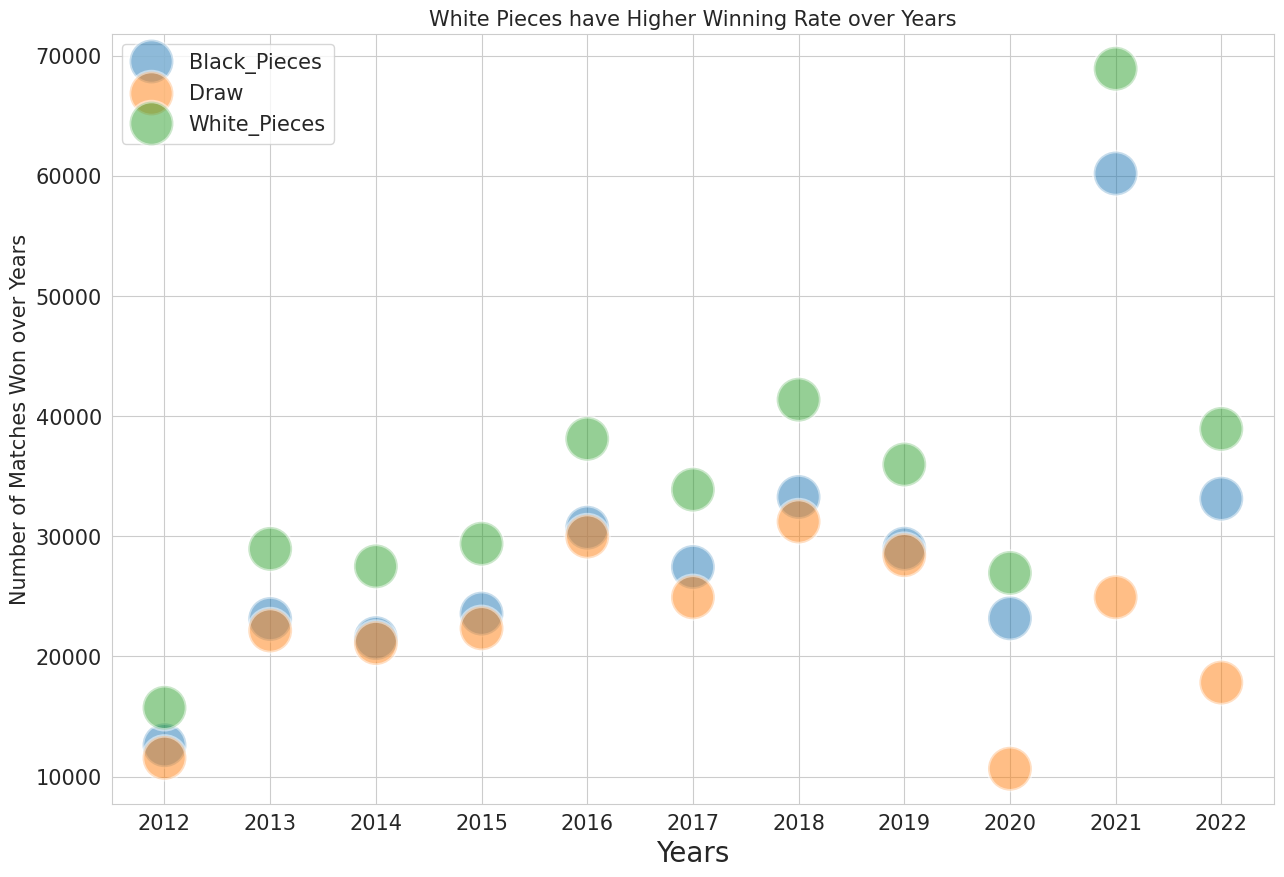

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,10))
plt.title("White Pieces have Higher Winning Rate over Years",size=15)
plt.xlabel("Years",size = 20)
plt.tick_params(axis='x',labelsize=15)
plt.ylabel("Number of Matches Won over Years", size = 15)
plt.tick_params(axis='y',labelsize=15)
sns.scatterplot(x=visualization_3.Year,y=visualization_3.Match_Count,hue=visualization_3.Winners,s=1000,alpha=0.5)
#mylables = ['Black_Pieces','Draw','White_Pieces']
plt.legend(loc='upper left',prop={'size':15})
#plt.show()